In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from copy import deepcopy
warnings.filterwarnings("ignore")

In [14]:
import pathos
import tqdm

In [4]:
def runner(args):
    """Runner function for process pool
    
    Args:
        args: A pair where the first element is the function to run and
        the second element is a dictionary of kwargs
    Returns:
        Any: the result of the function in the first element
    """
    return args[0](**args[1])

In [10]:
def get_result(p, i, adaptive=True, verbose=False, do_plot=False):
    from skgaip.lung import PID, benchmark, allconf, LearnedBiasController, PaulaControllerWithHallucination
    if adaptive:
        controlalg = lambda waveform: PaulaControllerWithHallucination(waveform=waveform)
    else:
        controlalg = lambda waveform: PID([p, i, 0], dt=allconf['time']['dt'], waveform = waveform)

    return {
        "p": p,
        "i": i,
        "err": benchmark(controlalg, verbose=verbose, do_plot=do_plot)
    }

Loss Value with 9 delay, 6 C_lung = 46.218275928509456
Loss Value with 12 delay, 6 C_lung = 56.596697820947696
Loss Value with 15 delay, 6 C_lung = 68.16921419503353
Loss Value with 18 delay, 6 C_lung = 80.97827651715009
Loss Value with 21 delay, 6 C_lung = 95.06888260356128
Loss Value with 9 delay, 8 C_lung = 45.05590053824807
Loss Value with 12 delay, 8 C_lung = 55.874020106597705
Loss Value with 15 delay, 8 C_lung = 68.00019434068973
Loss Value with 18 delay, 8 C_lung = 81.47528737937803
Loss Value with 21 delay, 8 C_lung = 96.33004986144081
Loss Value with 9 delay, 10 C_lung = 46.877110821469024
Loss Value with 12 delay, 10 C_lung = 58.170498247399436
Loss Value with 15 delay, 10 C_lung = 70.81243251931178
Loss Value with 18 delay, 10 C_lung = 84.82469133053763
Loss Value with 21 delay, 10 C_lung = 100.22454716581852
Loss Value with 9 delay, 12 C_lung = 49.194105256363876
Loss Value with 12 delay, 12 C_lung = 60.828945509123905
Loss Value with 15 delay, 12 C_lung = 73.8299764687989

{'p': 0.1, 'i': 2, 'err': 72.82995036378249}

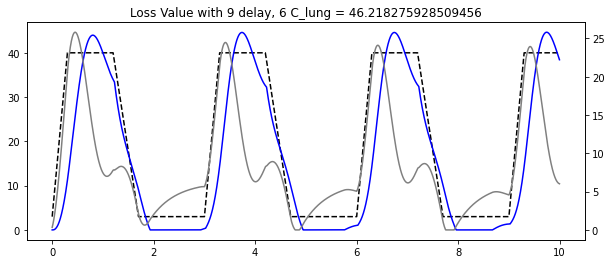

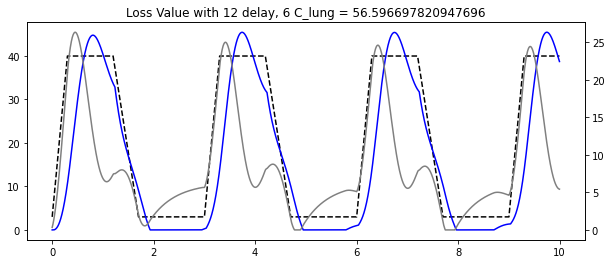

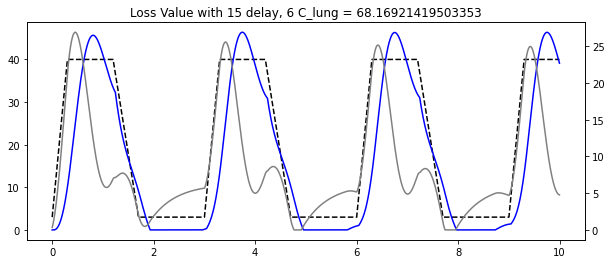

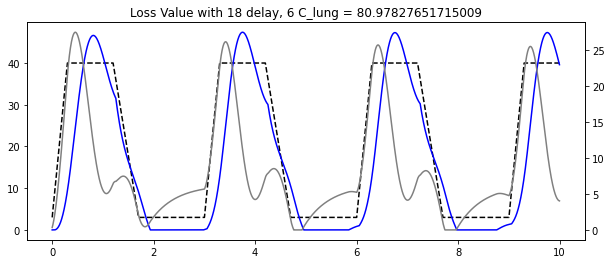

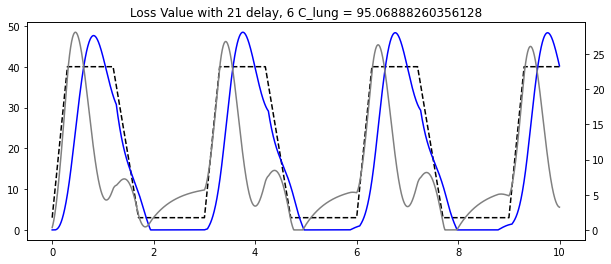

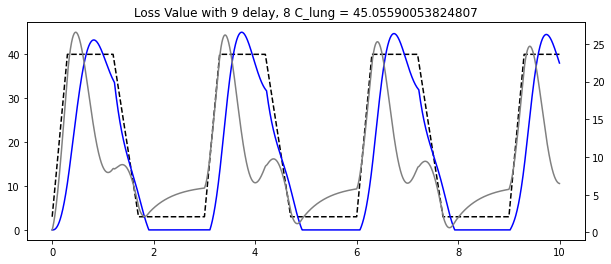

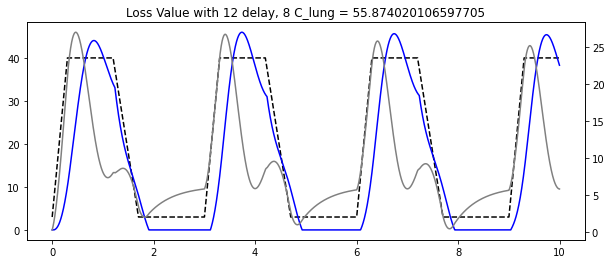

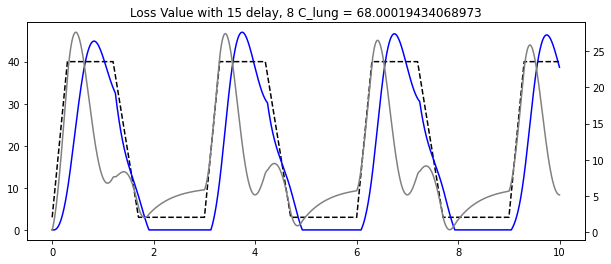

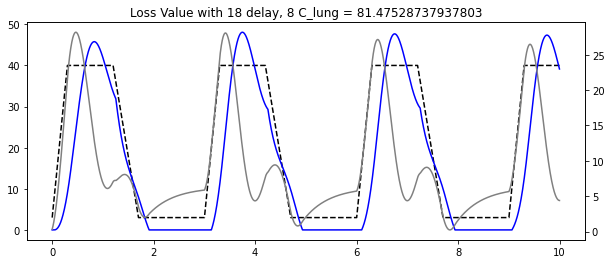

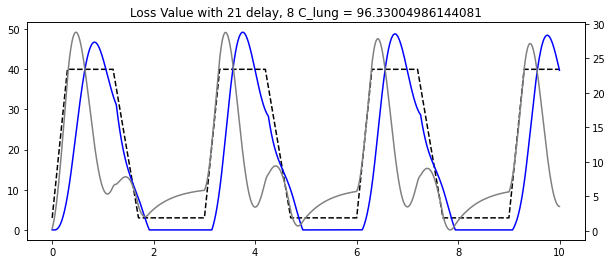

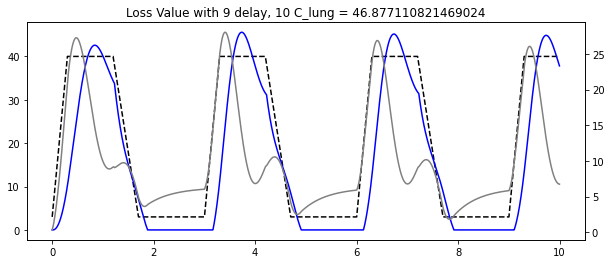

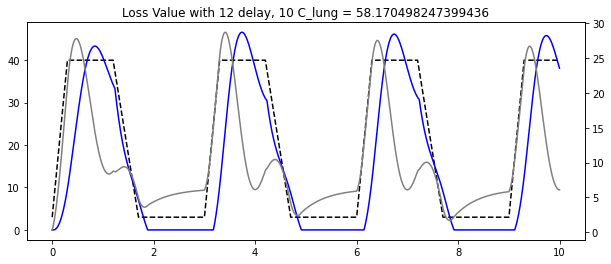

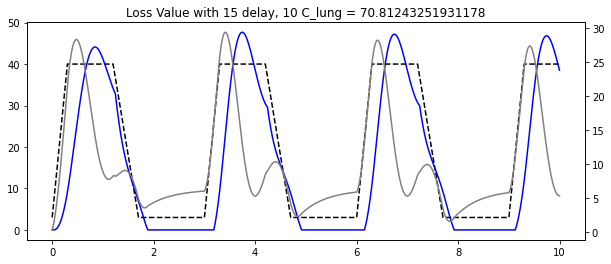

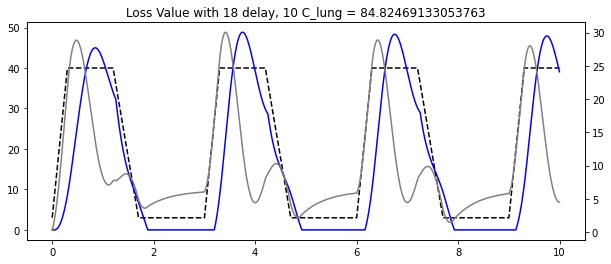

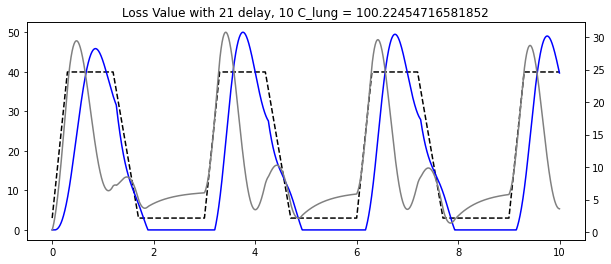

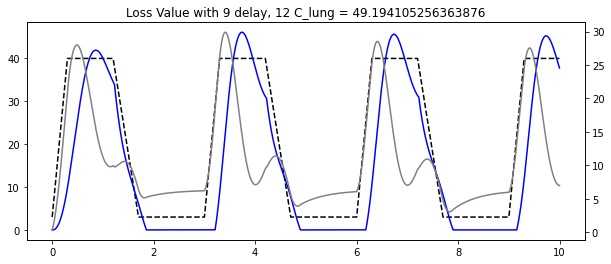

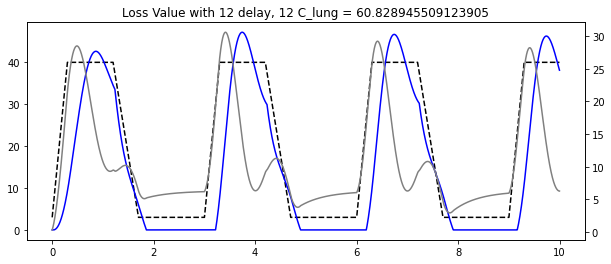

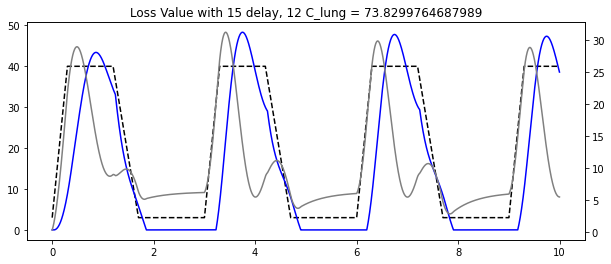

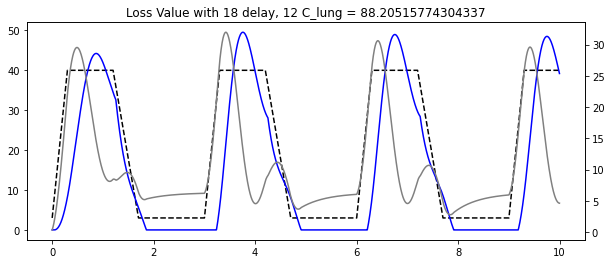

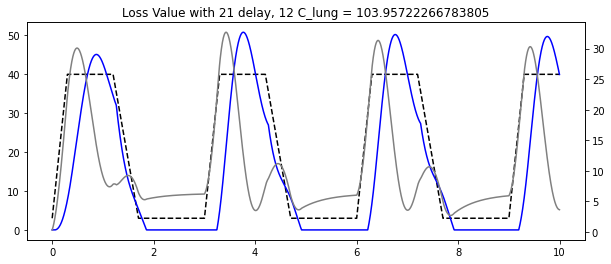

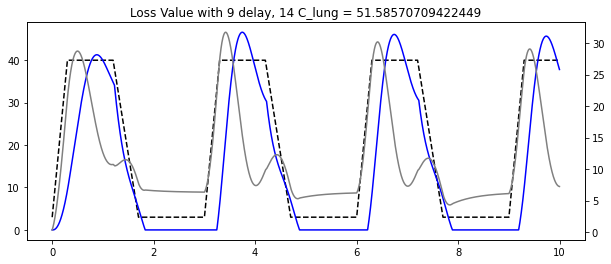

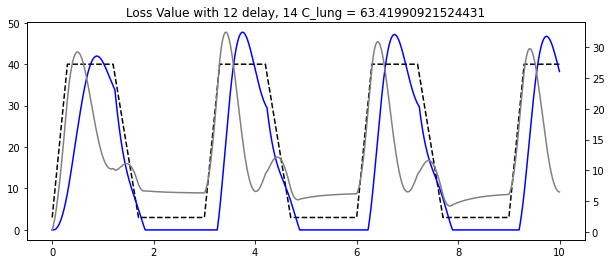

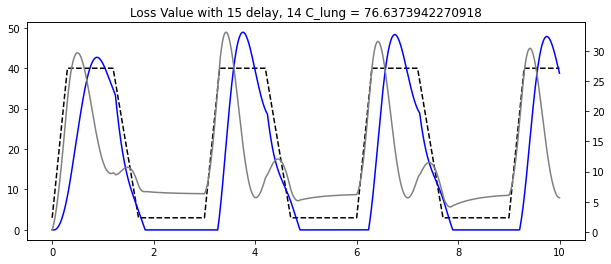

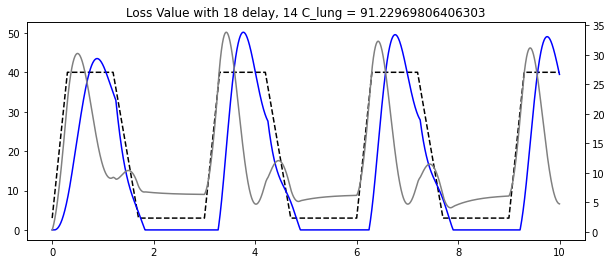

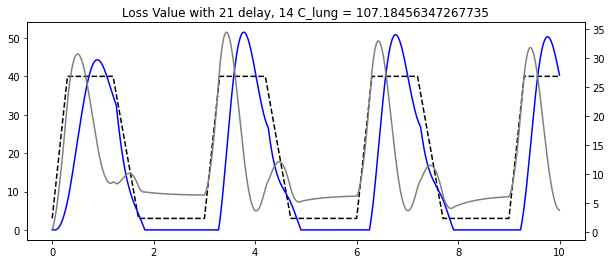

In [11]:
get_result(0.1, 2, adaptive=False, verbose=True, do_plot=True)

In [33]:
def generate_arglist():
    import numpy as np
    for p in np.linspace(0, 10, num=20):
        for i in np.linspace(0, 10, num=20):
            yield (get_result, {"p": p, "i": i})

In [34]:
single = lambda: map(runner, generate_arglist())
parallel = lambda: pathos.pools.ProcessPool(nodes=96).imap(runner, generate_arglist())

In [35]:
results = list(tqdm.tqdm(parallel()))

400it [01:44,  3.84it/s]


In [36]:
min_err = float("inf")
min_p = 99
min_i = 99
for result in results:
    if result["err"] < min_err:
        min_err = result["err"]
        min_p = result["p"]
        min_i = result["i"]

In [37]:
min_err

2.1527636653760096

In [38]:
min_p, min_i

(2.1052631578947367, 0.0)

Loss Value with 9 delay, 6 C_lung = 1.8723043300121427
Loss Value with 12 delay, 6 C_lung = 1.8827823643482942
Loss Value with 15 delay, 6 C_lung = 1.9081182152257992
Loss Value with 18 delay, 6 C_lung = 1.9124488438063683
Loss Value with 21 delay, 6 C_lung = 2.196529219722599
Loss Value with 9 delay, 8 C_lung = 1.8223015766100235
Loss Value with 12 delay, 8 C_lung = 1.8369197811690474
Loss Value with 15 delay, 8 C_lung = 1.8544891703865476
Loss Value with 18 delay, 8 C_lung = 1.9480403491330787
Loss Value with 21 delay, 8 C_lung = 2.6533097676457498
Loss Value with 9 delay, 10 C_lung = 1.8016776699492112
Loss Value with 12 delay, 10 C_lung = 1.8135704824512593
Loss Value with 15 delay, 10 C_lung = 1.8342790278642718
Loss Value with 18 delay, 10 C_lung = 1.9742884456177738
Loss Value with 21 delay, 10 C_lung = 2.9106661102576146
Loss Value with 9 delay, 12 C_lung = 1.8209201056497466
Loss Value with 12 delay, 12 C_lung = 1.8358334290747789
Loss Value with 15 delay, 12 C_lung = 1.865474

{'p': 2.1052631578947367, 'i': 0.0, 'err': 2.1527636653760096}

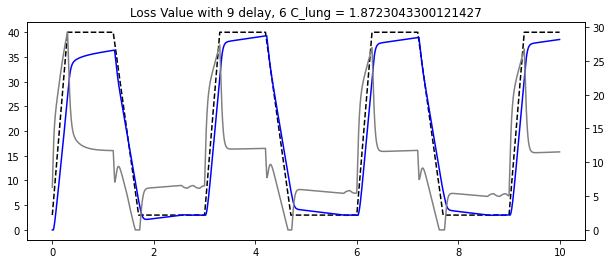

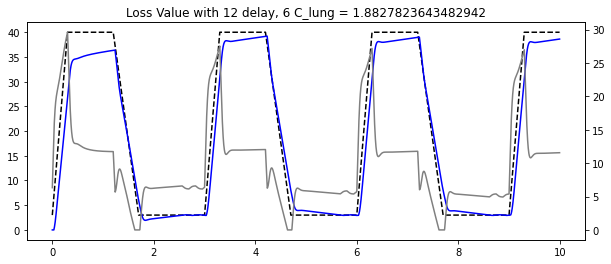

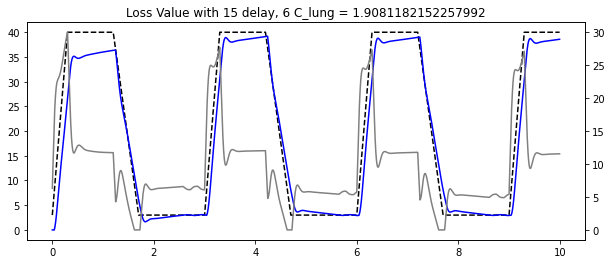

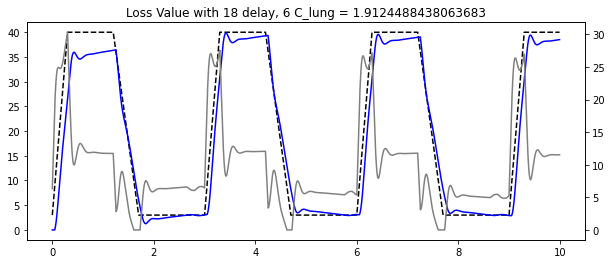

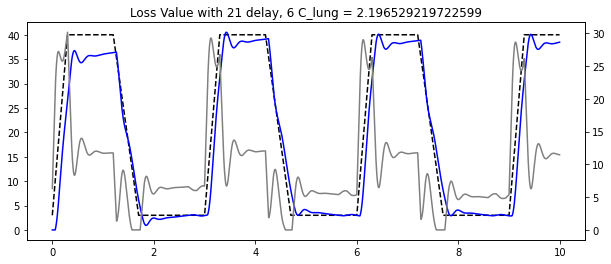

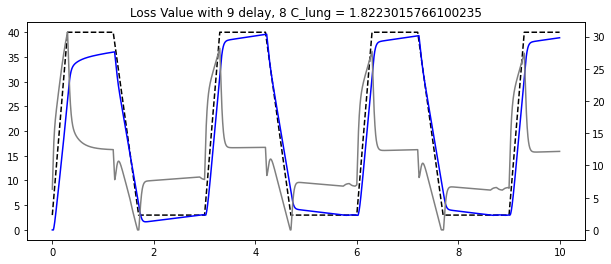

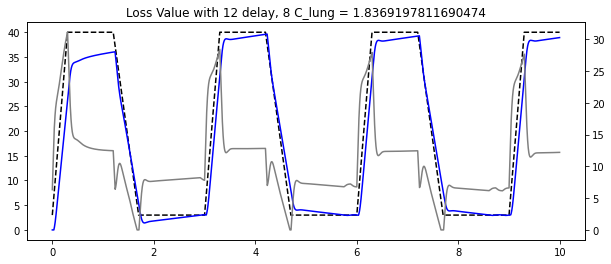

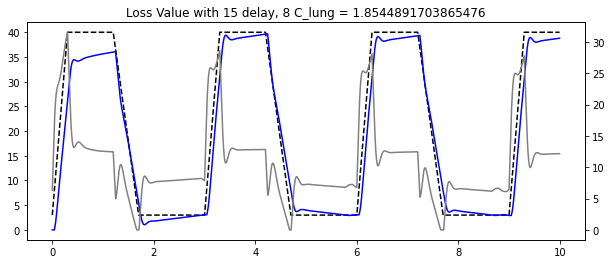

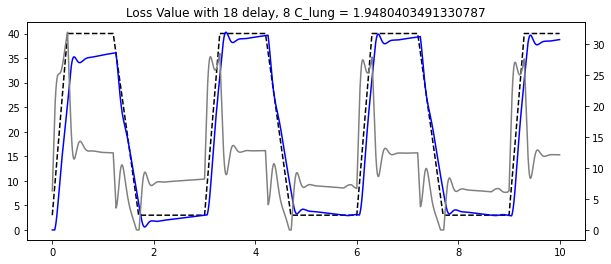

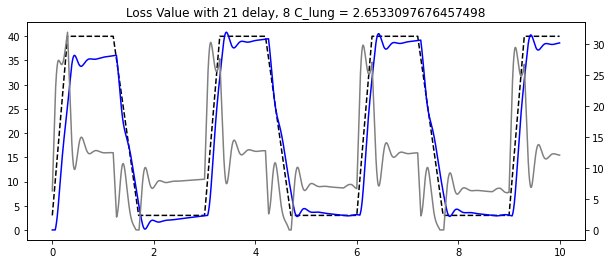

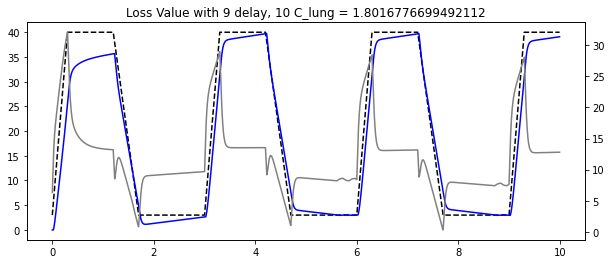

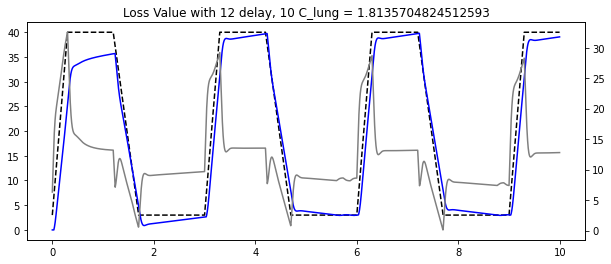

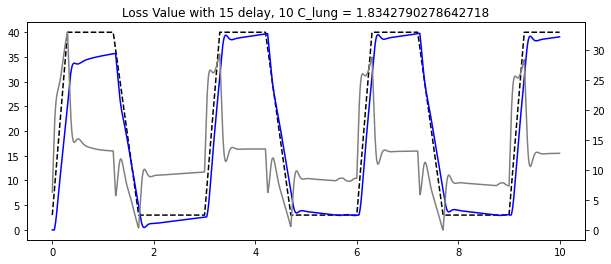

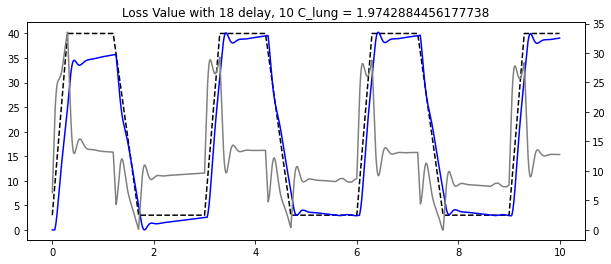

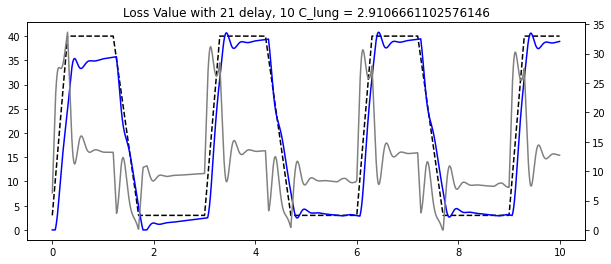

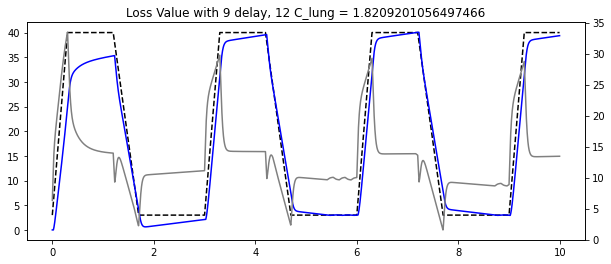

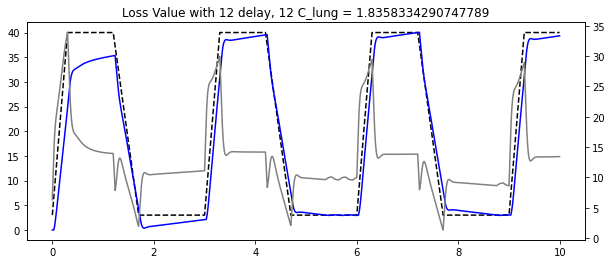

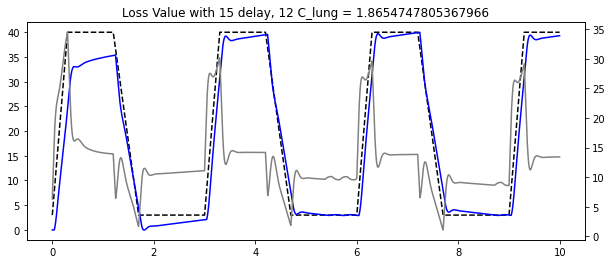

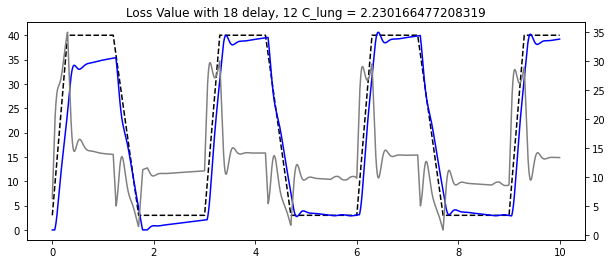

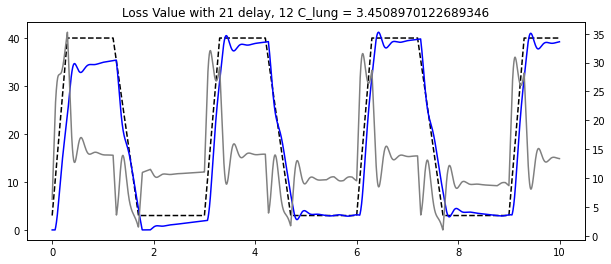

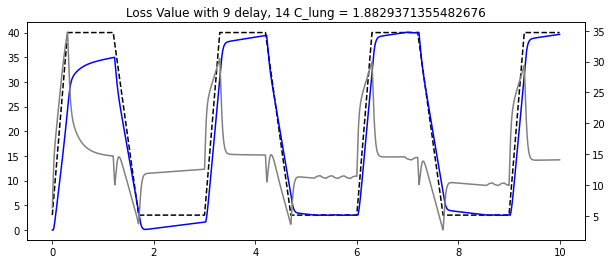

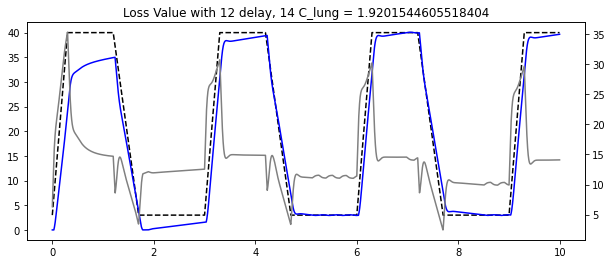

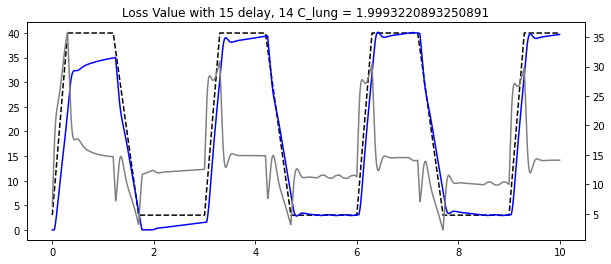

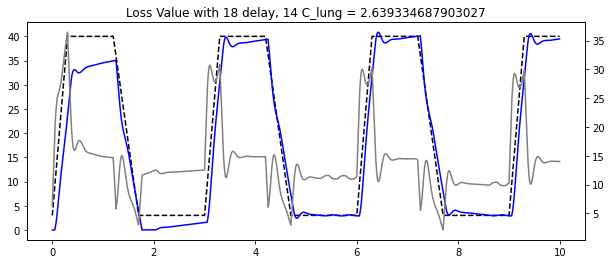

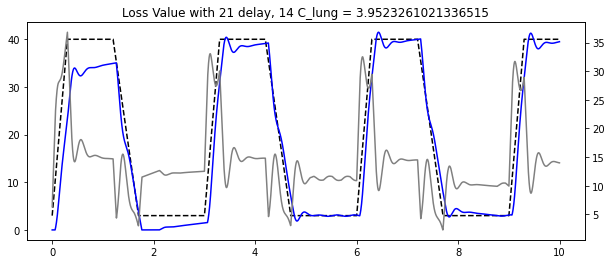

In [39]:
get_result(min_p, min_i, verbose=True, do_plot=True)